<a href="https://colab.research.google.com/github/thendralbala/ML_from_scratch/blob/main/4_Class_Imbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [10]:

def load_data(filename):
  X = []
  y = []

  with open(filename,'r') as f:
    for line in f.readlines():
      data = [float(X) for X in line.split(',')]
      X.append(data[:-1])
      y.append(data[-1])

  X = np.array(X)
  y = np.array(y)

  return X, y


In [18]:
def data_visualization(class_0, class_1):
  plt.figure()
  plt.scatter(class_0[:,0], class_0[:,1], facecolors = 'black', edgecolors = 'black', marker = 's')
  plt.scatter(class_1[:,0], class_1[:,1], facecolors = 'None', edgecolors = 'black', marker = 's')
  plt.title('Input data')
  plt.show()


In [22]:
def plot_classifier(classifier, X, y, title='Classifier boundaries', annotate=False):
    # define ranges to plot the figure
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0

    # denotes the step size that will be used in the mesh grid
    step_size = 0.01

    # define the mesh grid
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

    # compute the classifier output
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # reshape the array
    mesh_output = mesh_output.reshape(x_values.shape)

    # Plot the output using a colored plot
    plt.figure()

    # Set the title
    plt.title(title)

    # choose a color scheme you can find all the options
    # here: http://matplotlib.org/examples/color/colormaps_reference.html
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)

    # Overlay the training points on the plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # specify the ticks on the X and Y axes
    plt.xticks(())
    plt.yticks(())

    if annotate:
        for x, y in zip(X[:, 0], X[:, 1]):
            # Full documentation of the function available here:
            # http://matplotlib.org/api/text_api.html#matplotlib.text.Annotation
            plt.annotate(
                '(' + str(round(x, 1)) + ',' + str(round(y, 1)) + ')',
                xy = (x, y), xytext = (-15, 15),
                textcoords = 'offset points',
                horizontalalignment = 'right',
                verticalalignment = 'bottom',
                bbox = dict(boxstyle = 'round,pad=0.6', fc = 'white', alpha = 0.8),
                arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0'))

In [11]:
input_file = 'data_multivar_imbalance.txt'

X, y = load_data(input_file)


In [12]:
class_0 = np.array([X[i] for i in range(len(X)) if y[i] == 0])
class_1 = np.array([X[i] for i in range(len(X)) if y[i] == 1])


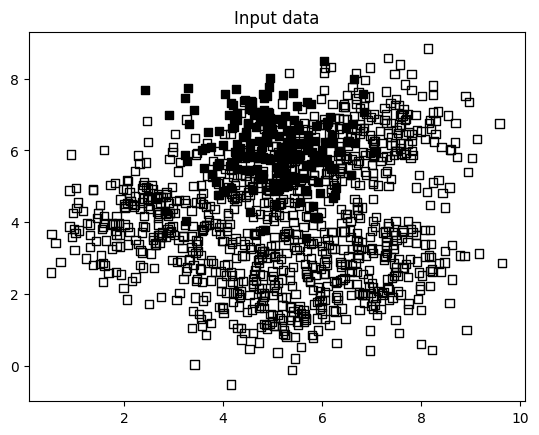

In [19]:
data_visualization(class_0, class_1)

The input data is clearly not balanced, significantly lesser data points for class 0 than for class 1

In [21]:
#Building an SVM with linear kernel
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)


SVC(kernel='linear')

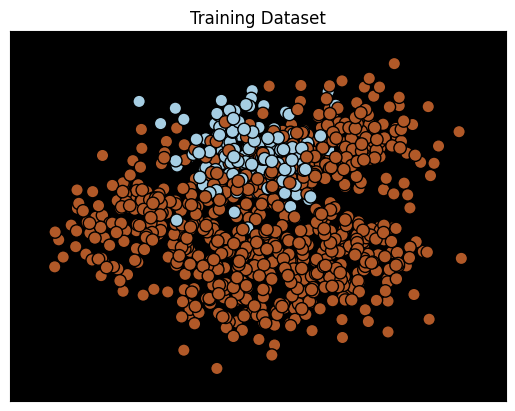

In [23]:
plot_classifier(classifier, X_train, y_train, 'Training Dataset')
plt.show()

because of class imbalance in input data the classifier predicts all as class 1 and none as class 0. That's why there is no boundary in the plot

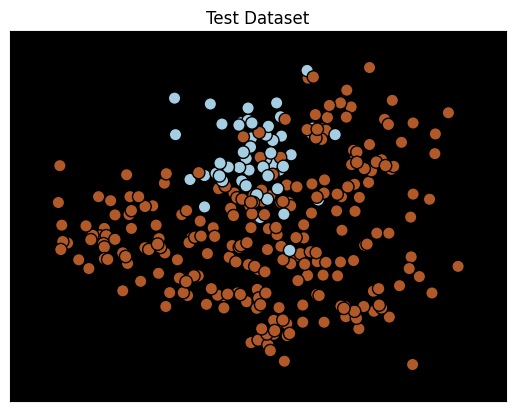

In [24]:
y_test_pred = classifier.predict(X_test)
plot_classifier(classifier, X_test, y_test, 'Test Dataset')
plt.show()

In [26]:
target_names = ['Class-' + str(int (i)) for i in set(y)]
print("Classifier performance of testing dataset")
print(classification_report(y_test, y_test_pred, target_names = target_names))

Classifier performance of testing dataset
              precision    recall  f1-score   support

     Class-0       0.00      0.00      0.00        53
     Class-1       0.82      1.00      0.90       247

    accuracy                           0.82       300
   macro avg       0.41      0.50      0.45       300
weighted avg       0.68      0.82      0.74       300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The precision for class 0 is 0.00% here

#Class Balancing

the parameter class_weight='balanced' balances the class imbalance in the input data

In [28]:
classifier_cb = SVC(kernel = 'linear', class_weight = 'balanced')
classifier_cb.fit(X_train, y_train)


SVC(class_weight='balanced', kernel='linear')

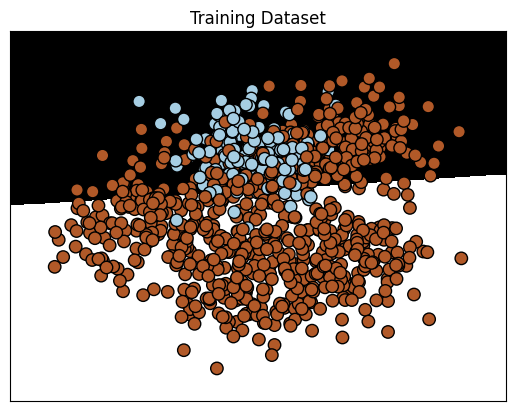

In [29]:
plot_classifier(classifier_cb, X_train, y_train, 'Training Dataset')
plt.show()

Now, there is a clear boundary in the plot

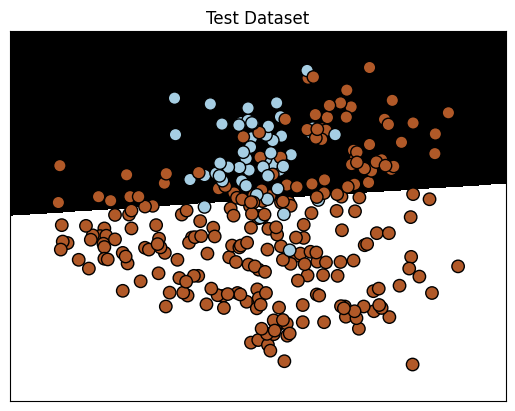

In [30]:
y_test_pred = classifier_cb.predict(X_test)
plot_classifier(classifier_cb, X_test, y_test, 'Test Dataset')
plt.show()

In [31]:

print("Classifier performance of testing dataset")
print(classification_report(y_test, y_test_pred, target_names = target_names))

Classifier performance of testing dataset
              precision    recall  f1-score   support

     Class-0       0.39      0.87      0.54        53
     Class-1       0.96      0.71      0.82       247

    accuracy                           0.74       300
   macro avg       0.68      0.79      0.68       300
weighted avg       0.86      0.74      0.77       300



Now we have a non-zero precision for class 0